In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', None)
%pprint off

Pretty printing has been turned OFF


In [2]:
def rearrange_col(dataframe, col_to_move, reference_col, right=True):
    col_list = dataframe.columns.values.tolist()
    col_list2 = [x for x in col_list if x != col_to_move]
    reference_idx = col_list2.index(reference_col)
    if right==True:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.append(col_to_move)
        return dataframe[col_list3]
    else:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.insert(-2, col_to_move)
        return  dataframe[col_list3]

In [3]:
fpath = '/Users/songheekim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/results_clean_0628.csv'

In [4]:
#### PART1: CALCULATE SUBJECT-TO-GROUP CORRELATION PER HIT
res = pd.read_csv(fpath, converters={'response': eval, 'RT': eval, 'buttonpress': eval, 'catch_response': eval})
#res.sort_values(by=['stim_id', 'id'], inplace=True)
print('before catch-based rejection:', res.shape)

######################### check number of responses per lemma
# for i in set(res['stim_id']): 
#     df = res.loc[res['stim_id']==i]
#     print (i, df.shape[0])

########################## convert N/A to 0 
res['catch_response_upd'] = res['catch_response'].apply(lambda x: [0 if i=='7' else float(i) for i in x])
res['response_upd'] = res['response'].apply(lambda x: [0 if i=='7' else float(i) for i in x])

res = rearrange_col(res, 'catch_response_upd', 'catch_response')
res = rearrange_col(res, 'response_upd', 'response')

res.drop(columns=['catch_response', 'response'], inplace=True)
res.rename(columns={'response_upd': 'response', 'catch_response_upd':'catch_response'}, inplace=True)

# ######################## drop bad subjects
res = res.loc[res['badsubject']=='N', ]
print ('after catch-based rejection:', res.shape)
res.head()

before catch-based rejection: (2816, 20)
after catch-based rejection: (2458, 20)


,id,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject
0,1,159,laugh,1,"[1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 5.0, 6.0, ...",2021-05-25 16:26:41,2021-05-25 16:35:15,"[10451, 2940, 2319, 3999, 2779, 3110, 6525, 75...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, ...",8545510,A3I9XLIHPPWPN1,f,57,18.0,Dataanalystadministrationassistant,1,1,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N
1,2,295,see,2,"[6.0, 3.0, 0.0, 1.0, 1.0, 2.0, 0.0, 4.0, 0.0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,m,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N
2,3,214,flatten,3,"[3.0, 0, 0, 0, 5.0, 3.0, 1.0, 1.0, 3.0, 2.0, 0...",2021-05-25 16:26:58,2021-05-25 16:36:47,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,m,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N
4,5,262,calm,5,"[4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 4.0, ...",2021-05-25 16:28:07,2021-05-25 16:38:09,"[4142, 2349, 7257, 8933, 4802, 3372, 3349, 830...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, ...",1247441,A2LF84L3K71GR2,f,38,12.0,RestaurantSupervisor,5,5,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N
5,6,7,jump,6,"[3.0, 0, 0, 0, 0, 1.0, 0.0, 3.0, 6.0, 3.0, 0.0...",2021-05-25 16:29:58,2021-05-25 16:45:19,"[9500, 3180, 3371, 90941, 4762, 8544, 6685, 40...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8286749,A1VSHM4NLZ705D,m,41,12.0,retail,6,6,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N


In [10]:
#################### create an average dict ###################### 
stim_id_n = len(set(res['stim_id']))  ###i.e., 320

response_n = len(res.iloc[0]["response"])
column = []
for i in range(1, response_n+1):
    column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

avg_dict = {}
for i in range(1, stim_id_n+1):
    df = res.loc[res['stim_id']==i, ]
    df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)
    avg = list(df_responses.mean())
    avg = [round(i,3) for i in avg]
#     print (df.shape)
#     print (df_responses.shape)

    avg_dict[i] = {'stim': df.iloc[0]['stim'], 'subject_ids': df['subject_id'].values.tolist(), 
                  'response_N': df.shape[0], 'avg_rating': avg}
#avg_df = pd.DataFrame.from_dict(avg_dict, orient='index')

In [11]:
avg_dict[10]

{'stim': 'swim', 'subject_ids': [47, 353, 135, 278, 645, 780, 365], 'response_N': 7, 'avg_rating': [1.714, 0.857, 1.0, 0.429, 2.857, 2.714, 0.571, 5.0, 5.714, 4.143, 2.0, 1.857, 2.0, 5.571, 3.143, 0.714, 3.571, 2.571, 0.286, 1.714, 2.143, 1.429, 1.714, 1.429, 0.571, 0.286, 2.857, 0.429, 0.571, 0.857, 1.286, 2.857, 5.429, 5.714, 4.429, 2.714, 4.714, 5.286, 2.857, 2.0, 2.571, 0.714, 1.286, 1.857, 2.143, 2.571, 1.714, 2.0, 1.429, 3.286, 0.571, 1.286, 1.571, 2.429, 1.857, 3.857, 1.286, 2.571, 0.571, 0.429, 0.571, 1.429, 0.286, 4.286, 1.286, 2.143, 3.571, 2.429, 5.429, 0.714, 3.429, 5.714]}

In [12]:
########calculate intersubject correlation and update res
from scipy.stats.stats import pearsonr

res_dict = res.set_index('id').to_dict(orient='index')
for k, v in res_dict.items():
    response = v['response']
    group_response = avg_dict[v['stim_id']]['avg_rating']
    v['corr'] = round(pearsonr(response, group_response)[0],3) ###correlation b/w this vector and group average vector for word X.
    v['corr_fisher'] = np.arctanh(v['corr'])
#pearsonr(response, group_response)[0]

### convert res_dict to df
res_upd = pd.DataFrame.from_dict(res_dict, orient='index')

#min(res_upd['corr_fisher'].values.tolist())
# res_upd2= res_upd.drop(columns=["RT", "buttonpress","turkcode","subject_num", "catch_subject_id","occupation"])
# res_upd2.loc[res_upd['badsubject']=='Y', ].sort_values(by='corr')

In [13]:
res_upd.head()

,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,...,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject,corr,corr_fisher
1,159,laugh,1,"[1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 5.0, 6.0, ...",2021-05-25 16:26:41,2021-05-25 16:35:15,"[10451, 2940, 2319, 3999, 2779, 3110, 6525, 75...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, ...",8545510,A3I9XLIHPPWPN1,...,57,18.0,Dataanalystadministrationassistant,1,1,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.893,1.436545
2,295,see,2,"[6.0, 3.0, 0.0, 1.0, 1.0, 2.0, 0.0, 4.0, 0.0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,...,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.788,1.066133
3,214,flatten,3,"[3.0, 0, 0, 0, 5.0, 3.0, 1.0, 1.0, 3.0, 2.0, 0...",2021-05-25 16:26:58,2021-05-25 16:36:47,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,...,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.753,0.979848
5,262,calm,5,"[4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 4.0, ...",2021-05-25 16:28:07,2021-05-25 16:38:09,"[4142, 2349, 7257, 8933, 4802, 3372, 3349, 830...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, ...",1247441,A2LF84L3K71GR2,...,38,12.0,RestaurantSupervisor,5,5,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.818,1.150743
6,7,jump,6,"[3.0, 0, 0, 0, 0, 1.0, 0.0, 3.0, 6.0, 3.0, 0.0...",2021-05-25 16:29:58,2021-05-25 16:45:19,"[9500, 3180, 3371, 90941, 4762, 8544, 6685, 40...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8286749,A1VSHM4NLZ705D,...,41,12.0,retail,6,6,"[0.0, 6.0, 0.0, 6.0, 6.0]",4,N,0.871,1.337208


In [ ]:
########### TODO 
### get overall descriptive statistics: mean intra-word individual-to-group correlation: 
## pick out worst words: lower inter-subject correlation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f814e797950>],
      dtype=object)

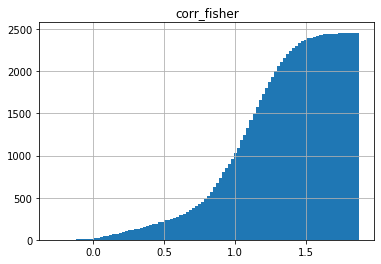

In [14]:
###### plot histogram
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
res_upd.hist(column='corr_fisher', cumulative=True, bins=100, ax=ax)
#fig.savefig(savepath+'/subj_to_group_corr_hist.png')

In [22]:
###### Part 2: find out bad words
quesf = '/Users/songheekim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/stimuli/questions.txt'
ques = pd.read_csv(quesf, delimiter='\t', header=None).iloc[:, :2].rename(columns={0:'fname', 1:'question'})
q_dict = ques.to_dict(orient='index')

#find only "verb" features
new_q = ques.iloc[67:,]
caused = ques.loc[ques['fname']=='Caused',]

verb_ques = pd.concat([caused, new_q])

In [23]:
verb_ques

,fname,question
46,Caused,To what extent does this verb describe an even...
67,Boundedness,Some verbs refer to an activity that could con...
68,Actor,To what extent does this verb describe somethi...
69,Done to Something Else,To what extent does this verb describe an acti...
70,State of Being,To what extent does this verb describe a <i>ch...
71,Require Energy Input,To what extent is physical or mental energy re...


In [29]:
q_dict[46]['fname']

'Caused'

In [37]:
## export data (for each verb, one response for each feature)

res_sub = res_upd[["stim_id", "stim", "subject_id", "response","correctN","corr_fisher"]]

new_column= list(range(response_n)) #[0,1,2,...71]
res_sub[new_column] = pd.DataFrame(res_sub.response.tolist(), index= res_sub.index)
res_sub = res_sub[["stim_id", "stim", "subject_id", "correctN", "corr_fisher", 46, 67, 68, 69, 70, 71]]

d = dict()
for i in [46,67,68,69,70,71]:
    d[i] = q_dict[i]['fname']

res_sub = res_sub.rename(columns=d)
res_sub.head()

##export res_sub
savepath = '/Users/songheekim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
res_sub.to_csv(savepath+'/clean_5features_individual.csv', index=False)

#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)
#to_add = pd.DataFrame(res_sub.response.tolist()).iloc[:, [46,67,68,69,70,71]]
#pd.DataFrame(res_sub.response.tolist())
#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)
#df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)

/Users/songheekim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [71]:
#########PART3: integrate SD dataframe with verblist
sdpath = '/Users/songheekim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/SD_by_word_and_feature.csv'
listpath = '/Users/songheekim/GoogleDrive/Primary/Projects/VerbVector/Verblists/List320.csv'

sd = pd.read_csv(sdpath, index_col=0)
verblist = pd.read_csv(listpath)
verblist = verblist.loc[verblist['in']==1]

###subset of verblist 
sd_upd = pd.merge(left=sd, right=verblist, left_on= 'word', right_on='Lemma')

In [74]:
sd_upd

,word,Actor,Boundedness,Caused,Done.to.Something.Else,Require.Energy.Input,State.of.Being,meanSD,Lemma,badverb,...,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F,I_Mean_RT_z,I_Mean_Accuracy_z,AgeofAcqsn_z,LogFreqHAL_z
0,hit,2.34,2.73,2.31,2.38,2.77,2.27,2.47,hit,n,...,536.469,0.97,533.103,1.000,4577.52,91.26,-1.834575,0.65,-1.675676,2.045417
1,behave,2.63,3.20,1.29,2.65,2.08,2.63,2.41,behave,n,...,699.125,0.97,571.259,1.000,771.87,116.65,-0.629538,0.65,-1.834459,1.040000
2,owe,2.34,2.58,1.97,2.81,2.51,2.00,2.37,owe,n,...,640.607,0.85,637.962,0.963,479.78,12.61,-1.063069,0.05,-0.371622,0.963750
3,emerge,1.94,1.33,3.13,2.58,2.14,2.95,2.35,emerge,n,...,653.382,1.00,631.889,1.000,318.67,111.12,-0.968425,0.80,0.016892,0.644583
4,vanish,2.59,2.25,2.81,1.72,2.35,2.35,2.35,vanish,n,...,672.515,0.97,601.222,1.000,530.52,88.72,-0.826678,0.65,-0.381757,0.450417
5,allow,2.62,2.05,1.91,2.39,2.07,2.39,2.24,allow,n,...,591.382,1.00,587.407,0.964,386.97,139.77,-1.427752,0.80,-1.483108,2.121250
6,constitute,2.16,2.48,1.86,1.79,2.43,2.58,2.22,constitute,n,...,775.229,1.00,771.464,1.000,538.05,203.61,-0.065721,0.80,1.010135,0.992917
7,shine,2.50,1.77,1.46,2.94,2.41,2.23,2.22,shine,n,...,607.515,0.97,630.000,1.000,3375.13,514.57,-1.308231,0.65,-1.324324,0.797083
8,hire,2.36,2.20,2.31,2.07,2.14,2.19,2.21,hire,n,...,637.226,0.94,573.321,1.000,3032.60,117.47,-1.088117,0.50,-0.239865,1.340833
9,accumulate,1.95,1.21,2.31,2.94,2.73,2.07,2.20,accumulate,n,...,734.088,1.00,763.786,1.000,145.33,65.58,-0.370514,0.80,0.875000,0.449167


In [ ]:
# list_1 = [1, 1, 1, 1]
# list_2 = [-1, -1, -1, -1]
# list_3 = [1, 3, 5, 7]
# list_4 = [0,0,0,100]
# dfx=pd.DataFrame({"list_1":list_1,"list_2":list_2,"list_3":list_3,"list_4":list_4})
# dfx

In [ ]:
# t1= '0_6_0_6_6'
# t1.split('_')

# testlist = ['5', '7', '3', '0', '6', '0', '3', '1', '0']
# ['0' if t=='7' else t for t in testlist]
#new_prices = [round(price - (price * 10 / 100), 2) if price > 50 else price for price in prices]

In [ ]:
####### spread responses into separate columns
# df_test = res[["id", "stim_id", "response"]]

#print ('before spreading:', res.shape)

# response_n = len(res.iloc[0]["response"])
# column = []
# for i in range(1, response_n+1):
#     column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

# res[column] = pd.DataFrame(res.response.tolist(), index=res.index)

# print ('after spreading:', res.shape)

#res.tail()

#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)

In [ ]:
# for r in range(len(res_upd.iloc[0]['response'])):
#     print (r, res_upd.iloc[0]['response'][r])

In [ ]:
#np.arctanh(0.767)

# from scipy.stats import zprob
# def z_transform(r, n):
#     z = np.log((1 + r) / (1 - r)) * (np.sqrt(n - 3) / 2)
#     p = zprob(-z)
#     return p